# Analysis of car-related data

### Necessary imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

### path setting

In [3]:
DATA_DIR = os.path.abspath('data')

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, "car_data.csv"))
df_v3 = pd.read_csv(os.path.join(DATA_DIR, "car_details_v3.csv"))
df_v4 = pd.read_csv(os.path.join(DATA_DIR, "car_details_v4.csv"))
df_cars_details_dekho = pd.read_csv(os.path.join(DATA_DIR, "CAR_DETAILS_FROM_CAR_DEKHO.csv"))

### Initial data inspection

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df_cars_details_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df_v3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
df_v4.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [9]:
print("\033[1m columns of car data: \033[0m", list(df.columns))
print("\n")
print("\033[1mcolumns of cardetails v3 motor: \033[0m",list(df_v3.columns))
print("\n")
print("\033[1mcolumns of car details v4 motor: \033[0m", list(df_v4.columns))
print("\n")
print("\033[1mcolumns of car details from car dekho: \033[0m", list(df_cars_details_dekho.columns))


 columns of car data:  ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


columns of cardetails v3 motor:  ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


columns of car details v4 motor:  ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


columns of car details from car dekho:  ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [10]:
car_data_shape = df.shape
car_details_v3_shape = df_v3.shape
car_details_v4_shape = df_v4.shape
car_details_dekho_shape = df_cars_details_dekho.shape

print("\033[1mcar data shape: \033[0m", car_data_shape)
print("\033[1mcar details v3 shape: \033[0m", car_details_v3_shape)
print("\033[1mcar details v4 shape: \033[0m", car_details_v4_shape)
print("\033[1mcar details dekho shape: \033[0m", car_details_dekho_shape)


car data shape:  (301, 9)
car details v3 shape:  (8128, 13)
car details v4 shape:  (2059, 20)
car details dekho shape:  (4340, 8)


In [11]:
(df.describe())

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
df_v3.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [13]:
df_v4.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [14]:
df_cars_details_dekho.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [15]:
print(df.isna().sum())
print("______________________________________________________________")
print(df_v3.isna().sum())
print("______________________________________________________________")
print(df_v4.isna().sum())
print("______________________________________________________________")
print(df_cars_details_dekho.isna().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
______________________________________________________________
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64
______________________________________________________________
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length        

In [16]:
car_names = df["Car_Name"].unique()
print("\033[1m car names: \033[0m", list(car_names))
print("\n")
print("\033[1m number of unique car names: \033[0m", len(car_names))

 car names:  ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser', 'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Ho

In [17]:
print(df["Car_Name"].value_counts())
print("_________________________________________________________")
print(df_v3["name"].value_counts())
print("_________________________________________________________")
print(df_v4["Make"].value_counts())
print("_________________________________________________________")
print(df_cars_details_dekho["name"].value_counts())


Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
_________________________________________________________
name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1

### Initial visuals

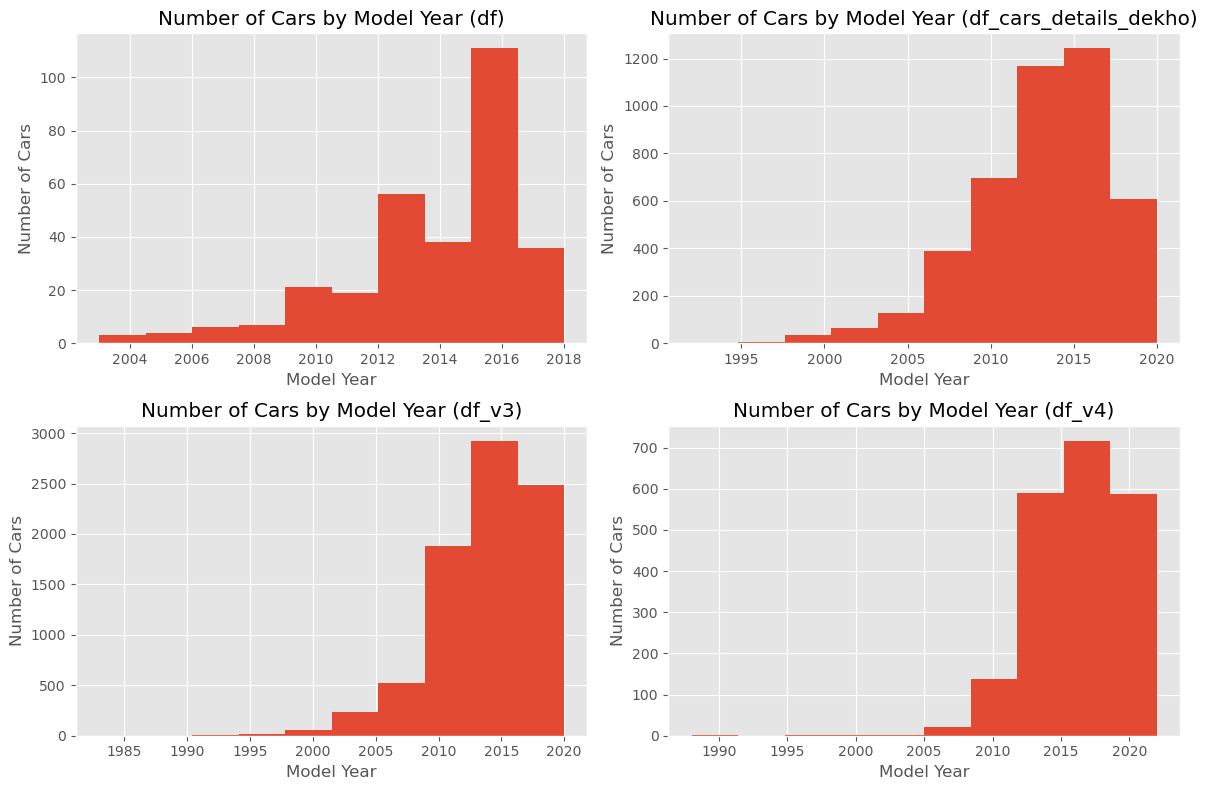

In [18]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Year'], bins=10)
axs[0, 0].set_title('Number of Cars by Model Year (df)')
axs[0, 0].set_xlabel('Model Year')
axs[0, 0].set_ylabel('Number of Cars')

axs[0, 1].hist(df_cars_details_dekho['year'], bins=10)
axs[0, 1].set_title('Number of Cars by Model Year (df_cars_details_dekho)')
axs[0, 1].set_xlabel('Model Year')
axs[0, 1].set_ylabel('Number of Cars')

axs[1, 0].hist(df_v3['year'], bins=10)
axs[1, 0].set_title('Number of Cars by Model Year (df_v3)')
axs[1, 0].set_xlabel('Model Year')
axs[1, 0].set_ylabel('Number of Cars')

axs[1, 1].hist(df_v4['Year'], bins=10)
axs[1, 1].set_title('Number of Cars by Model Year (df_v4)')
axs[1, 1].set_xlabel('Model Year')
axs[1, 1].set_ylabel('Number of Cars')

plt.tight_layout()

plt.show()

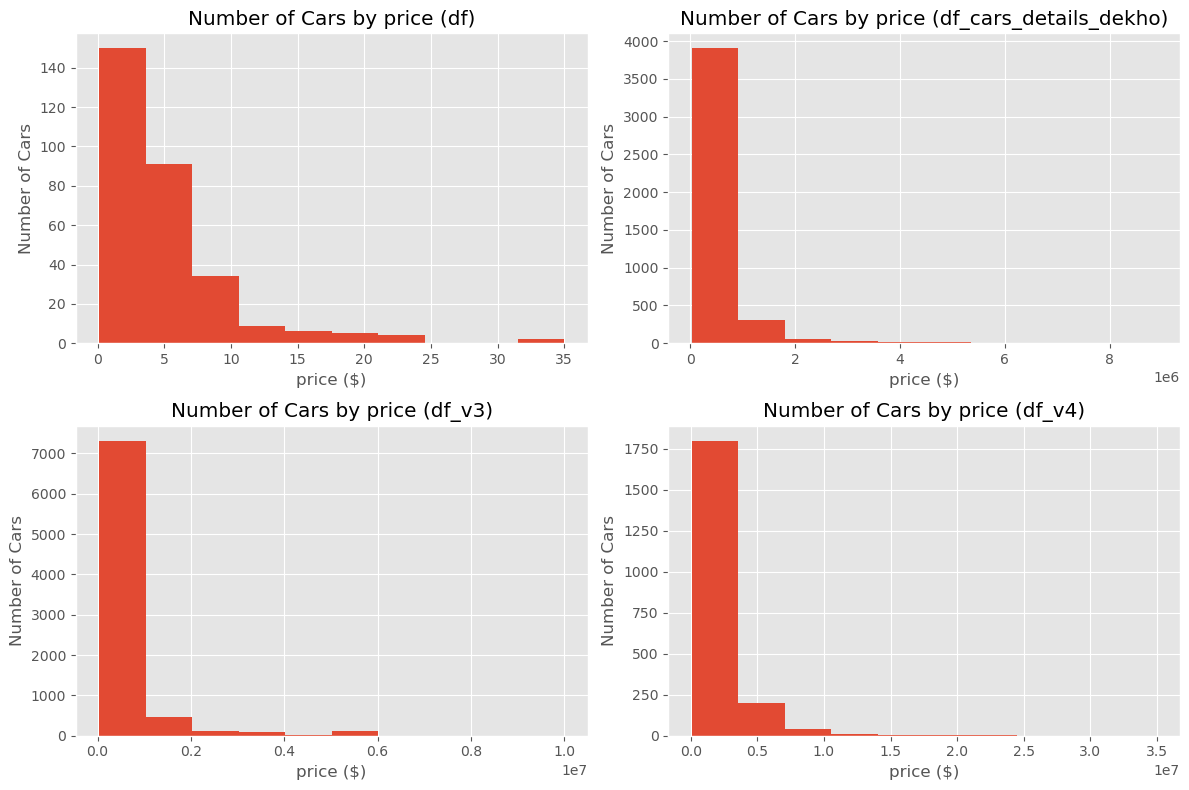

In [19]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Selling_Price'], bins=10)
axs[0, 0].set_title('Number of Cars by price (df)')
axs[0, 0].set_xlabel('price ($)')
axs[0, 0].set_ylabel('Number of Cars')

axs[0, 1].hist(df_cars_details_dekho['selling_price'], bins=10)
axs[0, 1].set_title('Number of Cars by price (df_cars_details_dekho)')
axs[0, 1].set_xlabel('price ($)')
axs[0, 1].set_ylabel('Number of Cars')

axs[1, 0].hist(df_v3['selling_price'], bins=10)
axs[1, 0].set_title('Number of Cars by price (df_v3)')
axs[1, 0].set_xlabel('price ($)')
axs[1, 0].set_ylabel('Number of Cars')

axs[1, 1].hist(df_v4['Price'], bins=10)
axs[1, 1].set_title('Number of Cars by price (df_v4)')
axs[1, 1].set_xlabel('price ($)')
axs[1, 1].set_ylabel('Number of Cars')

plt.tight_layout()

plt.show()

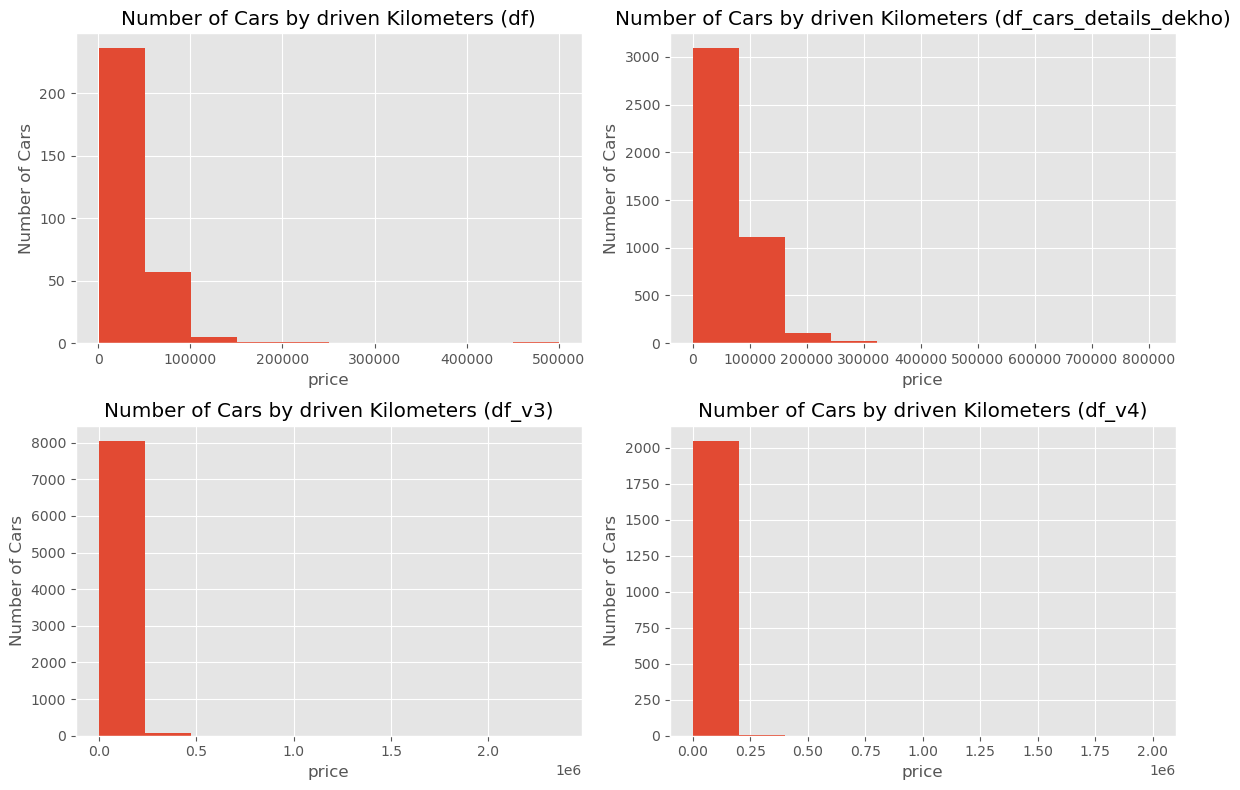

In [20]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Kms_Driven'], bins=10)
axs[0, 0].set_title('Number of Cars by driven Kilometers (df)')
axs[0, 0].set_xlabel('price')
axs[0, 0].set_ylabel('Number of Cars')

axs[0, 1].hist(df_cars_details_dekho['km_driven'], bins=10)
axs[0, 1].set_title('Number of Cars by driven Kilometers (df_cars_details_dekho)')
axs[0, 1].set_xlabel('price')
axs[0, 1].set_ylabel('Number of Cars')

axs[1, 0].hist(df_v3['km_driven'], bins=10)
axs[1, 0].set_title('Number of Cars by driven Kilometers (df_v3)')
axs[1, 0].set_xlabel('price')
axs[1, 0].set_ylabel('Number of Cars')

axs[1, 1].hist(df_v4['Kilometer'], bins=10)
axs[1, 1].set_title('Number of Cars by driven Kilometers (df_v4)')
axs[1, 1].set_xlabel('price')
axs[1, 1].set_ylabel('Number of Cars')

plt.tight_layout()

plt.show()

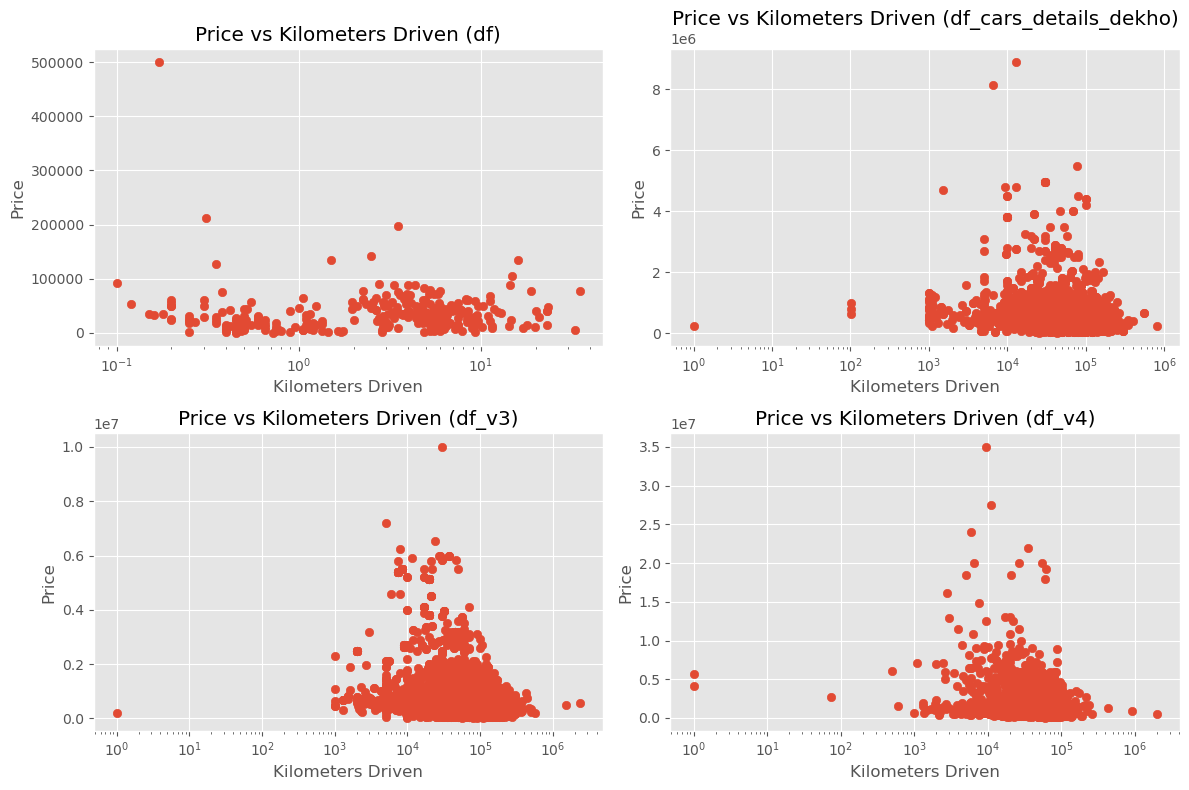

In [21]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(df['Selling_Price'], df['Kms_Driven'])
axs[0,0].set_title('Price vs Kilometers Driven (df)')
axs[0,0].set_xlabel('Kilometers Driven')
axs[0,0].set_ylabel('Price')
axs[0,0].set_xscale('log')


axs[0, 1].scatter(df_cars_details_dekho['km_driven'], df_cars_details_dekho['selling_price'])
axs[0, 1].set_title('Price vs Kilometers Driven (df_cars_details_dekho)')
axs[0, 1].set_xlabel('Kilometers Driven')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_xscale('log')

axs[1, 0].scatter(df_v3['km_driven'], df_v3['selling_price'])
axs[1, 0].set_title('Price vs Kilometers Driven (df_v3)')
axs[1, 0].set_xlabel('Kilometers Driven')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_xscale('log')

axs[1, 1].scatter(df_v4['Kilometer'], df_v4['Price'])
axs[1,1].set_title('Price vs Kilometers Driven (df_v4)')
axs[1,1].set_xlabel('Kilometers Driven')
axs[1,1].set_ylabel('Price')
axs[1, 1].set_ylabel('Price')
axs[1, 1].set_xscale('log')

plt.tight_layout()

plt.show()

In [22]:
print(df['Fuel_Type'].value_counts())
print("_________________________________________________________")
print(df_v3['fuel'].value_counts())
print("_________________________________________________________")
print(df_v4['Fuel Type'].value_counts())
print("_________________________________________________________")
print(df_cars_details_dekho['fuel'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
_________________________________________________________
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
_________________________________________________________
Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64
_________________________________________________________
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


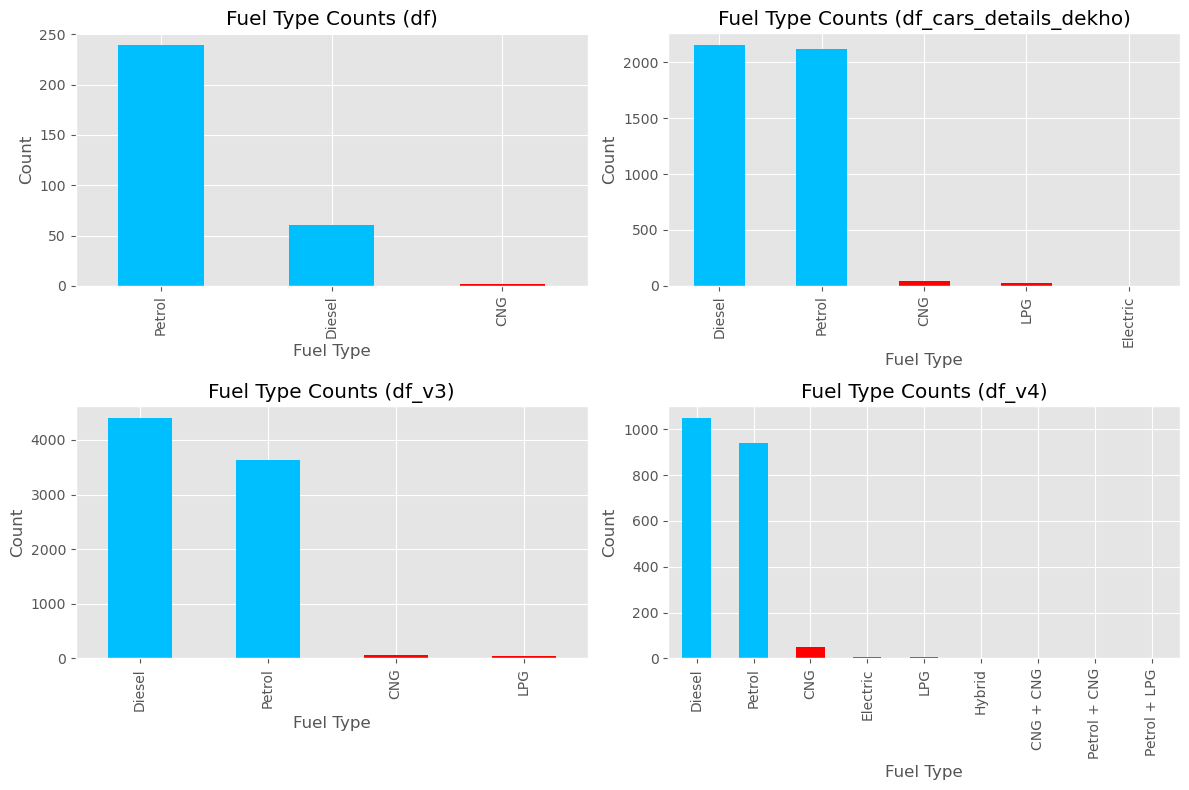

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)

categories= df_v4['Fuel Type'].unique()
blue_categories = ['Diesel','Petrol']
colors = ['deepskyblue' if x in blue_categories else 'red' for x in categories]

df['Fuel_Type'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
df_cars_details_dekho['fuel'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_cars_details_dekho)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
df_v3['fuel'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_v3)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df_v4['Fuel Type'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_v4)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
print(df['Transmission'].value_counts())
print("________________________________________________________")
print(df_v3['transmission'].value_counts())
print("________________________________________________________")
print(df_v4['Transmission'].value_counts())
print("________________________________________________________")
print(df_cars_details_dekho['transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
________________________________________________________
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
________________________________________________________
Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64
________________________________________________________
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


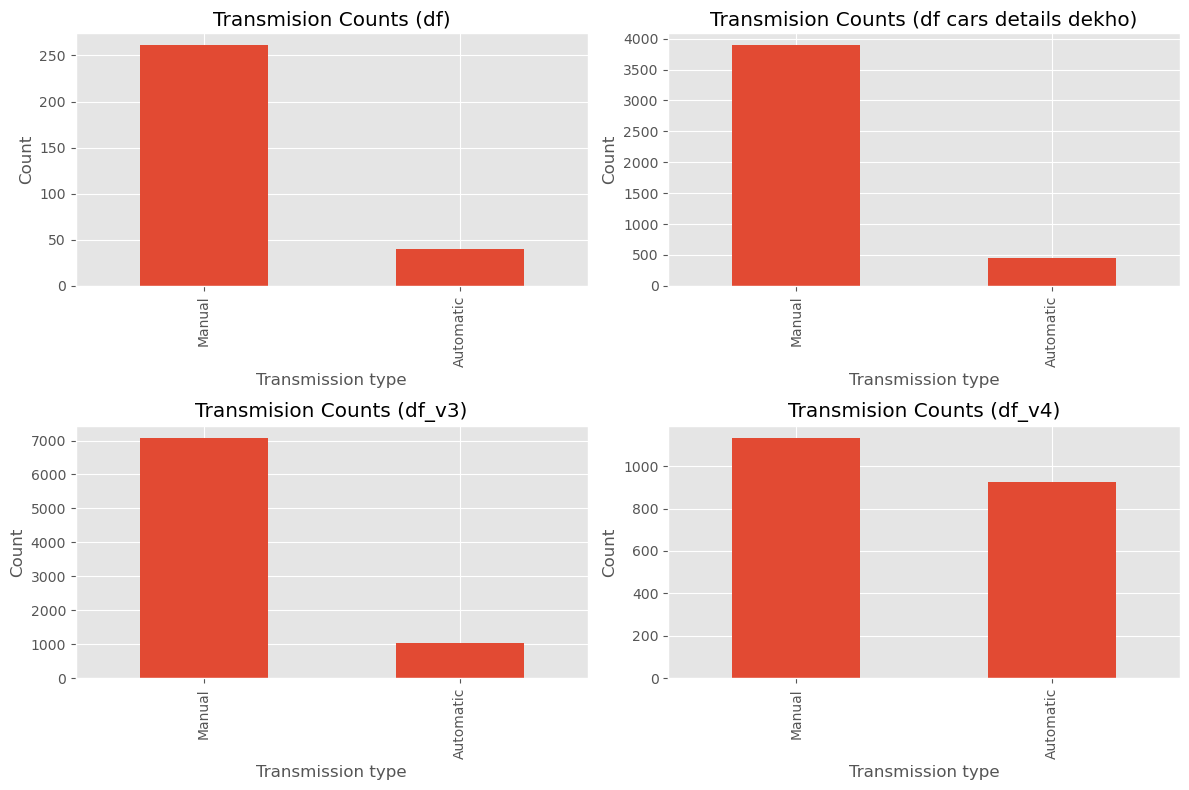

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)


df['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.subplot(2, 2, 2)
df_cars_details_dekho['transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df cars details dekho)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.subplot(2, 2, 3)
df_v3['transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df_v3)')
plt.xlabel('Transmission type')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df_v4['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df_v4)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### V3 AND V4 SPECIFIC COMPARISON 

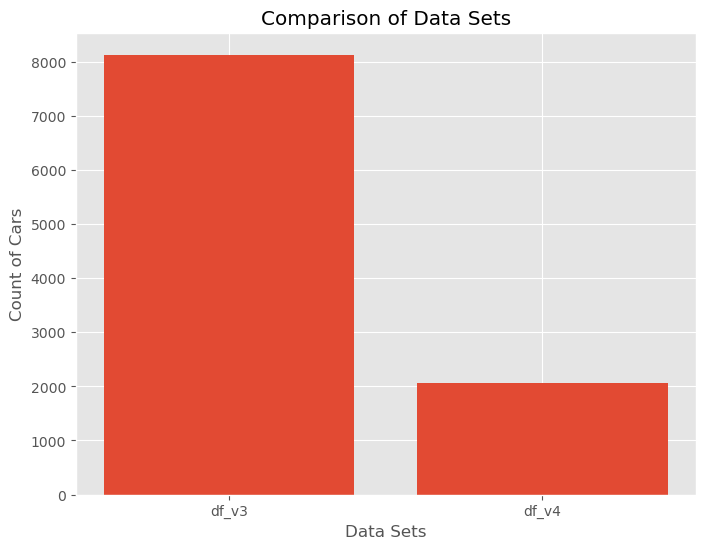

In [26]:
plt.figure(figsize=(8, 6))
datasets = ['df_v3', 'df_v4']
counts = [df_v3.shape[0], df_v4.shape[0]]
plt.bar(datasets, counts)
plt.title('V3 and V4 counts')
plt.xlabel('Data Sets')
plt.ylabel('Count of Cars')
plt.show()

In [ ]:
plt.bar(df_v3p["En"])